Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [16]:
df1 = pd.read_csv("C:/Users/fast/Desktop/Assignment/Desisin Tree/Fraud_check.csv")
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [47]:
for i in range(len(df1['Taxable.Income'])):
    if df1['Taxable.Income'][i] <= 30000:
        df1['Taxable.Income'][i] = 'risky'
    else:
        df1['Taxable.Income'][i] = 'good'

<ipython-input-47-c9e74aa2844d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Taxable.Income'][i] = 'risky'
C:\Users\fast\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [22]:
colnames = list(df1.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [23]:
df1 = pd.get_dummies(df1)
df1

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable.Income_good,Taxable.Income_risky,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,1,0,0,1
1,134075,18,0,1,1,0,0,1,0,0,1
2,160205,30,1,0,0,1,0,1,0,0,1
3,193264,15,0,1,0,0,1,1,0,0,1
4,27533,28,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,1,0,0,1
596,55369,2,0,1,1,0,0,1,0,0,1
597,154058,0,1,0,1,0,0,1,0,0,1
598,180083,17,0,1,0,1,0,1,0,1,0


In [24]:
df2= df1.drop('Marital.Status_Single', axis=1)
df3= df2.drop('Marital.Status_Divorced', axis=1)
df4= df3.drop('Undergrad_NO', axis=1)
df5= df4.drop('Urban_NO',axis=1)

In [25]:
df = df5.drop('Taxable.Income_good', axis=1)
df

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Taxable.Income_risky,Urban_YES
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [26]:
df1=df.rename({'Undergrad_YES':'Undergrad','Marital.Status_Married':'Marital.Status','Urban_YES':'Urban','Taxable.Income_risky':'Taxable.Income'}, axis=1)
df1

,City.Population,Work.Experience,Undergrad,Marital.Status,Taxable.Income,Urban
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [27]:
x=df1.iloc[:, [0,1,2,3,5]]
y=df1.iloc[:,4]

In [28]:
x,y

(     City.Population  Work.Experience  Undergrad  Marital.Status  Urban
 0              50047               10          0               0      1
 1             134075               18          1               0      1
 2             160205               30          0               1      1
 3             193264               15          1               0      1
 4              27533               28          0               1      0
 ..               ...              ...        ...             ...    ...
 595            39492                7          1               0      1
 596            55369                2          1               0      1
 597           154058                0          0               0      1
 598           180083               17          1               1      0
 599           158137               16          0               0      0
 
 [600 rows x 5 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 595    0
 596    0
 597    0
 598   

In [29]:
x

,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,50047,10,0,0,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: uint8

In [102]:
df1['Taxable.Income'].unique()

array(['risky'], dtype=object)

In [49]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=50)

 # Building Decision Tree Classifier (C5.0)

In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

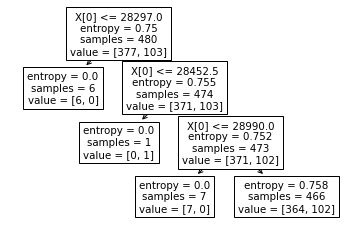

In [54]:
#PLot the decision tree
tree.plot_tree(model);

In [85]:
!pip install --upgrade scikit-learn==0.22

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\fast\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydot 
features = list(df.columns[1:])
features

In [ ]:
from sklearn.tree import export_graphviz
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [87]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    119
1      1
dtype: int64

In [88]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [89]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable.Income,,
0,98,1
1,21,0


In [90]:
# Accuracy 
np.mean(preds==y_test)

0.8166666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [92]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [93]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
#Prediction and computing the accuracy
pred = model.predict(x_test)
np.mean(pred==y_test)

0.8166666666666667

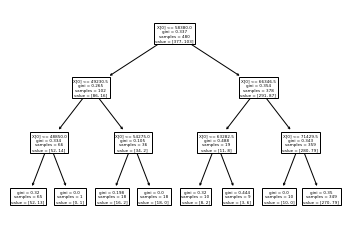

In [95]:
tree.plot_tree(model_gini);

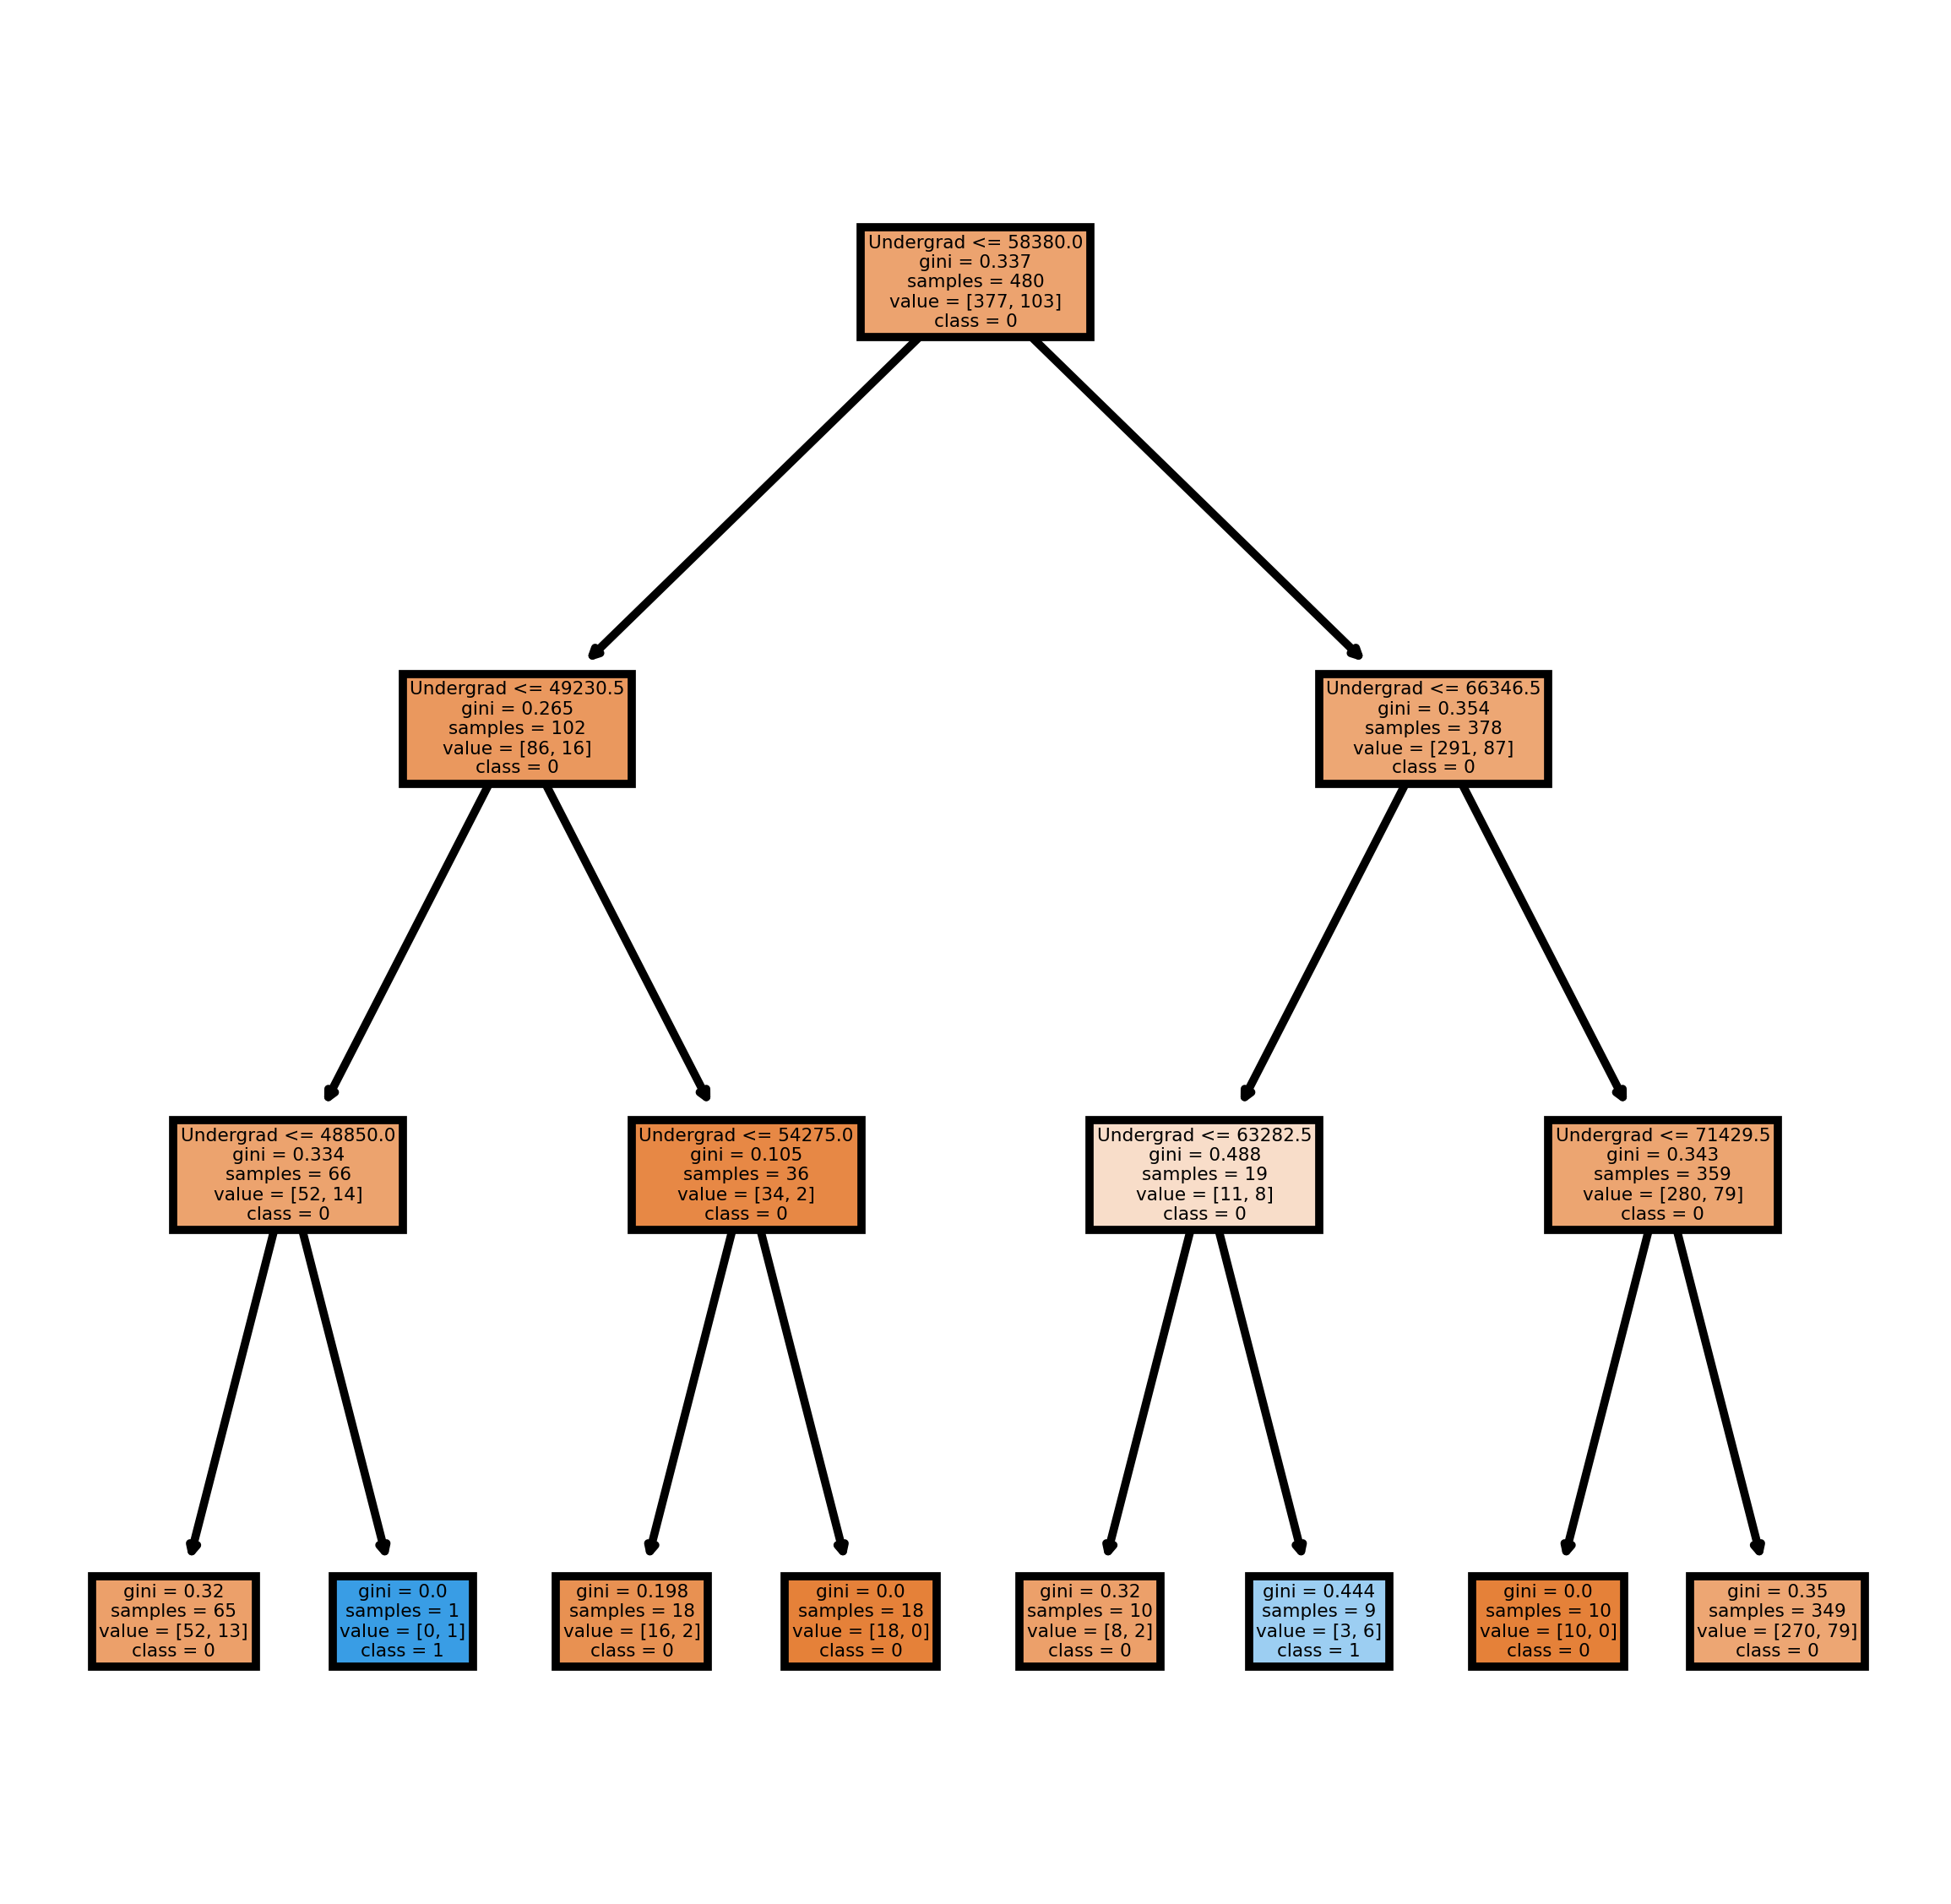

In [111]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700)
tree.plot_tree(model_gini,feature_names = fn, class_names= cn, filled = True);

In [ ]:
!pip install pydot
!pip install graphviz
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
dot_data = StringIO()  
export_graphviz(model_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Post pruning decision trees with cost complexity pruning

In [120]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [121]:
ccp_alphas

array([0.        , 0.00046296, 0.0020755 , 0.00250272, 0.00304461])

In [122]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 31 with ccp_alpha: 0.0030446134756130783


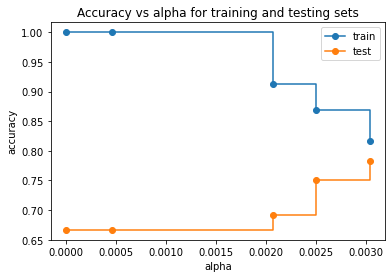

In [123]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [124]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00345)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00345, random_state=0)

In [125]:
pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.825

[Text(418.5, 271.8, 'gini = 0.337\nsamples = 480\nvalue = [377, 103]')]

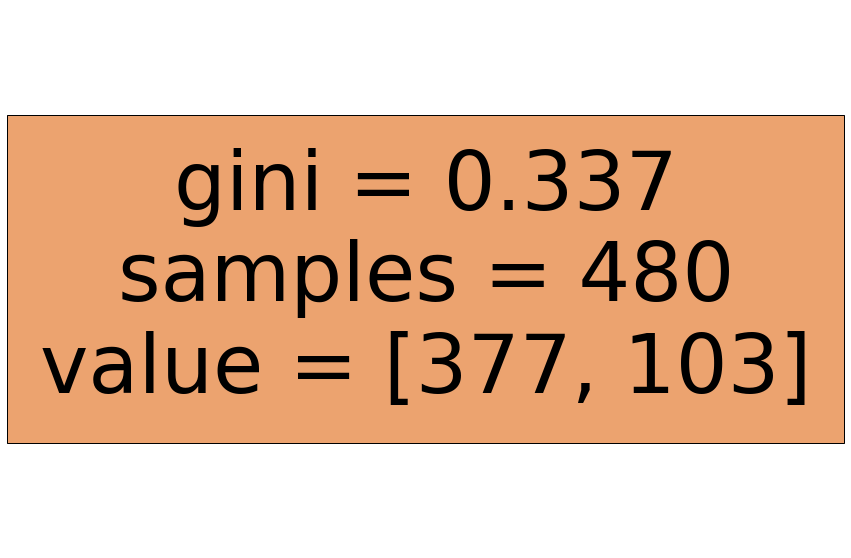

In [126]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [127]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [128]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

In [129]:
model = DecisionTreeRegressor(random_state=50, ccp_alpha=0.00345)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.00345, random_state=50)

In [130]:
#Find the accuracy
model.score(X_test, y_test)

-0.0005668934240359302

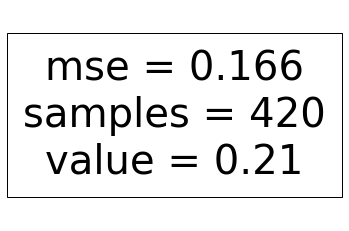

In [131]:
tree.plot_tree(model);

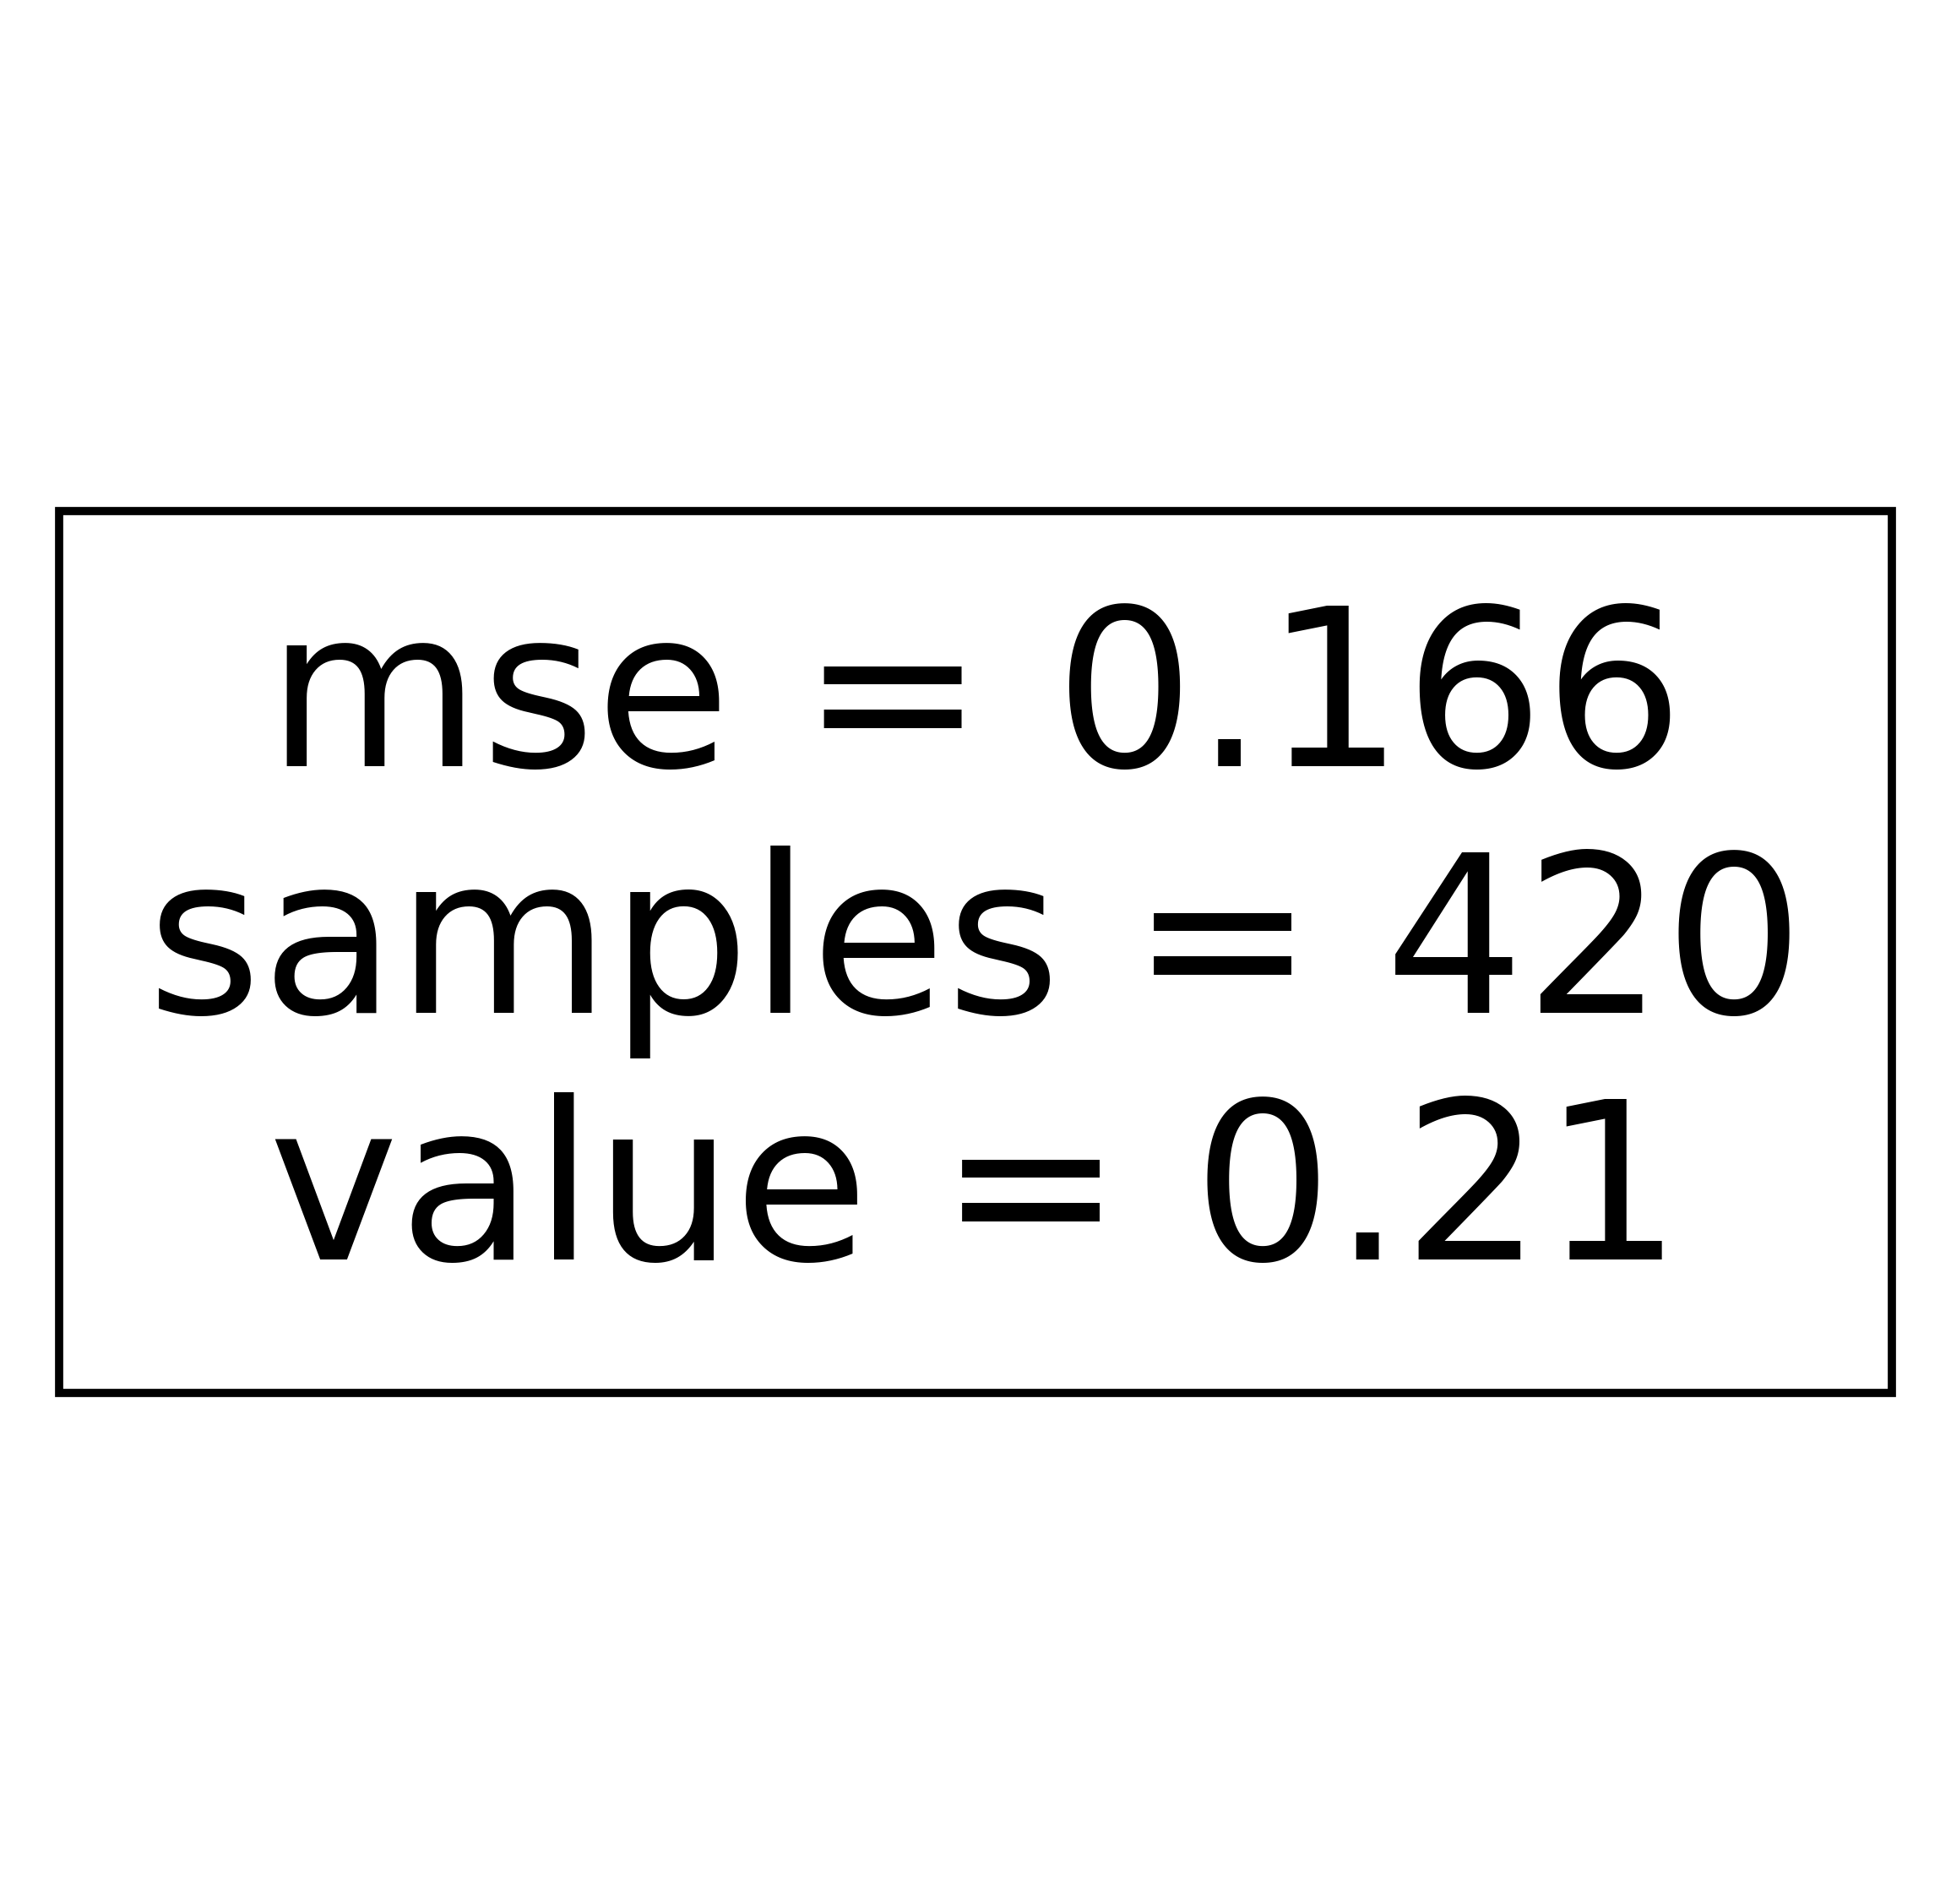

In [132]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Taxable.Income']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700)
tree.plot_tree(model,feature_names = fn, class_names= cn, filled = True);